# Task S4 T02
## Graphic display of multiple variables

#### - Exercise 1

Do the notebook practice on GitHub "03 EXAMINING DATA" (make a copy and run the commands with the same county.txt dataset). This exercise consists of observing the different possibilities offered by the different graphic display libraries.

https://github.com/IvanaCandyAguilar/Examining-Data/blob/main/03%20EXAMINING%20DATA.ipynb

#### - Exercise 2
Do the tasks of preprocessing and adaptation of the Dataset we have in the GitHub repository PRE-PROCESSING-DATA with the aim of preparing it and working on it as a dataframe to extract information from it.

->PRE-PROCESSING-DATA/movies.dat

Important

The final result should be a dataframe with the movie name, year and genre variables. It's also important to stick to just one genre for each movie!

In [194]:
import pandas as pd
import numpy as np

#print(pd.__version__)
df_main = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat",
sep='::', encoding = 'ISO-8859-1', index_col=0, names=['Id','Title_Year','Genre'], engine='python')

#df_movies = pd.DataFrame(df_main)

df_main.head()
#df_main.info

,Title_Year,Genre
Id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


Apartir del dataframe de lectura podemos iniciar la limpieza. Primero nos aseguramos que los tipos de datos sean correctos.

In [195]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title_Year  3883 non-null   object
 1   Genre       3883 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


Cambiamos a los tipos correctos

In [184]:
df_main['Title_Year'].astype('string')
df_main['Genre'].astype('string')

Id
1        Animation|Children's|Comedy
2       Adventure|Children's|Fantasy
3                     Comedy|Romance
4                       Comedy|Drama
5                             Comedy
                    ...             
3948                          Comedy
3949                           Drama
3950                           Drama
3951                           Drama
3952                  Drama|Thriller
Name: Genre, Length: 3883, dtype: string

In [193]:
#df_movies.describe()

describir lo que se hace en el siguiente codigo

In [186]:
df_main['Genre'] = df_main['Genre'].str.split('|')
df_main['Genre'] = df_main['Genre'].apply(lambda x: x[0])

df_main['Year'] = df_main['Title_Year'].str[-5:]
df_main['Year'] = df_main['Year'].str.replace(')', '', regex=True)

df_main['Title'] = df_main['Title_Year'].str[:-6]
df_main.pop('Title_Year')

Id
1                         Toy Story (1995)
2                           Jumanji (1995)
3                  Grumpier Old Men (1995)
4                 Waiting to Exhale (1995)
5       Father of the Bride Part II (1995)
                       ...                
3948               Meet the Parents (2000)
3949            Requiem for a Dream (2000)
3950                      Tigerland (2000)
3951               Two Family House (2000)
3952                 Contender, The (2000)
Name: Title_Year, Length: 3883, dtype: object

Cambiamos el tipo de dato de year a entero

In [187]:
# contar el número total de valores nulos en el DataFrame
total_nulos = df_main.isnull().sum().sum()

# calcular el porcentaje de valores nulos en el DataFrame
porcentaje_nulos = (total_nulos / (df_main.shape[0] * df_main.shape[1])) * 100

# imprimir el número total de valores nulos y el porcentaje de valores nulos
print("Número total de valores nulos: ", total_nulos)
print("Porcentaje de valores nulos: ", porcentaje_nulos, "%")

# obtener un resumen de los valores nulos por columna
resumen_nulos = df_main.isnull().sum()
print("\nResumen de valores nulos por columna:\n", resumen_nulos)

# obtener un resumen de los valores no nulos por columna
resumen_no_nulos = df_main.notnull().sum()
print("\nResumen de valores no nulos por columna:\n", resumen_no_nulos)

# obtener un resumen de los valores únicos por columna
resumen_unicos = df_main.nunique()
print("\nResumen de valores únicos por columna:\n", resumen_unicos)

Número total de valores nulos:  0
Porcentaje de valores nulos:  0.0 %

Resumen de valores nulos por columna:
 Genre    0
Year     0
Title    0
dtype: int64

Resumen de valores no nulos por columna:
 Genre    3883
Year     3883
Title    3883
dtype: int64

Resumen de valores únicos por columna:
 Genre      18
Year       81
Title    3841
dtype: int64


In [188]:
no_numerico = pd.to_numeric(df_main['Year'], errors='coerce').isnull()
print(df_main[no_numerico])

Empty DataFrame
Columns: [Genre, Year, Title]
Index: []


In [189]:
df_main['Year'].astype('int64')

Id
1       1995
2       1995
3       1995
4       1995
5       1995
        ... 
3948    2000
3949    2000
3950    2000
3951    2000
3952    2000
Name: Year, Length: 3883, dtype: int64

cambiamos el orden las columnas.

In [190]:
df_movies= df_main.reindex(columns=['Title','Year','Genre'])

limpiar duplicados

**Cleaning Empty cells**

In [197]:
df_main.dropna(inplace = True)

**Cleaning Data in wrong format**

**Cleaning Wrong data**

**Cleaning Duplicates**

#### - Exercise 3
Show your creativity. What do you think is relevant to show about the Dataset "movies.dat" from the previous exercise?

Make one or two graphical representations and justify your choice. 

Cantidad de peliculas por genero

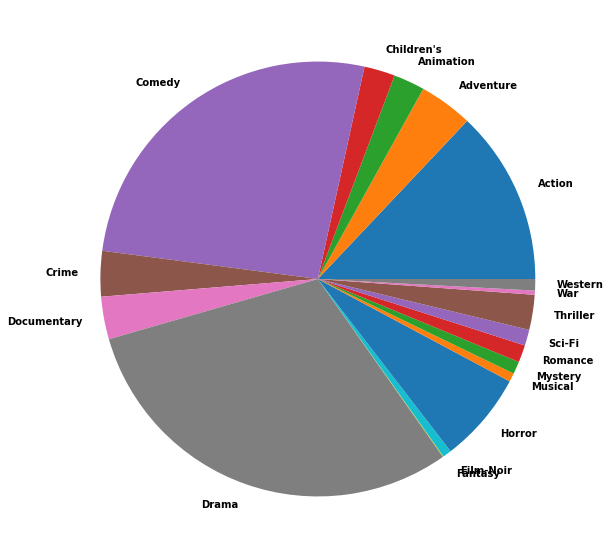

In [191]:
import matplotlib.pyplot as plt

df_count_genres = df_movies.groupby('Genre')['Title'].count().reset_index(name='Number_titles')

y = df_count_genres['Number_titles']
mylabels = df_count_genres['Genre']

plt.figure(figsize=(12, 10))
plt.pie(y, labels = mylabels)
plt.show() 

Explain

Cantidad de peliculas por año

Explain

Preferencias simulado

Explain

Genero año

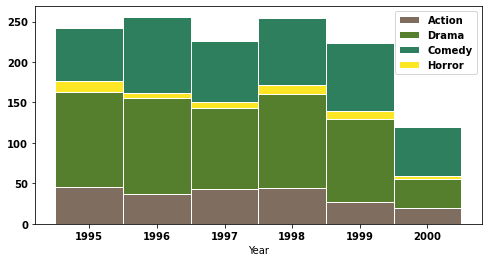

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

plt.figure(figsize=(8,4))
# y-axis in bold
rc('font', weight='bold')

# Count number of movies per year
df_count_movies_year = df_movies.groupby('Year')['Title'].count().reset_index(name='Number_movies')

# Get data for years 1995-2000

df_count_title_genre_year = df_movies.groupby(['Year', 'Genre'])['Title'].count().reset_index(name='Count_title')

df_count_title_genre_last6years = df_count_title_genre_year[df_count_title_genre_year['Year'].isin(df_count_title_genre_year['Year'].unique()[-6:])]

label1 ='Action'
label2 ='Drama'
label3 ='Comedy'
label4 ='Horror'

# Values of each group
bars1 = df_count_title_genre_last6years['Count_title'].loc[df_count_title_genre_last6years['Genre'] == 'Action'].tolist()
bars2 = df_count_title_genre_last6years['Count_title'].loc[df_count_title_genre_last6years['Genre'] == 'Drama'].tolist()
bars3 = df_count_title_genre_last6years['Count_title'].loc[df_count_title_genre_last6years['Genre'] == 'Comedy'].tolist()
bars4 = df_count_title_genre_last6years['Count_title'].loc[df_count_title_genre_last6years['Genre'] == 'Horror'].tolist()

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['1995', '1996', '1997', '1998', '1999','2000']
barWidth = 1

#Create labels for legend

label1 ='Action'
label2 ='Drama'
label3 ='Comedy'
label4 ='Horror'
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth, label=label1)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth, label=label2)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth, label=label3)
# Create green bars (top)
plt.bar(r, bars4, bottom=bars, color='#fde725', edgecolor='white', width=barWidth, label=label4)
 
# Custom X axis
plt.legend(loc='upper right')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year")

# Show graphic
plt.show()